# Test of adaptative threshold for the multilayer graph

In [1]:
import pandas as pd
import memebox.multilayergraph as mlg
import configparser
config = configparser.ConfigParser()
config.read('memeconfig.ini')
#data_path = config['DEFAULT']['data_path']
pickle_data_path = config['DEFAULT']['pickle_data_path']
viz_path = config['DEFAULT']['viz_data_path']
time_component_path = config['DEFAULT']['time_data_path']

series_name = 'LBDL'
series_name = 'marseille'

pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
text_data = pd.read_pickle(pickle_file)


In [2]:
def compute_components(text_data,day_list,threshold):
	# compute the components
	# return the multilayer graph and the graph of compressed components
	
	print('Computing the multilayer graph.')
	H = mlg.multilayergraph(text_data,day_list,threshold)
	print('Compressing the connected components.')
	G_all = mlg.compress_multilayer(H)
	G_all.graph['series_name'] = series_name
	return H,G_all

In [9]:
year = 2016
month = 3
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold = 30)
print(H.size())
print(G_all.size())

Dates are from 01-03-2016 to 31-03-2016.
Computing the multilayer graph.
Nb of edges: 3666, nb of nodes: 5871.
Compressing the connected components.
3666
32


In [3]:
year = 2016
month = 3
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold = 30)
print(H.size())
print(G_all.size())

Dates are from 01-03-2016 to 31-03-2016.
Computing the multilayer graph.
Nb of edges: 39, nb of nodes: 53.
Compressing the connected components.
39
32


In [4]:
H.size()

3666

In [10]:
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold=50)
print(H.size())
print(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 14385, nb of nodes: 21415.
Compressing the connected components.
14385
776


In [4]:
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold=50)
print(H.size())
print(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 834, nb of nodes: 772.
Compressing the connected components.
834
781


In [11]:
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold=80)
print(H.size())
print(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 13784, nb of nodes: 21331.
Compressing the connected components.
13784
187


In [5]:
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold=80)
print(H.size())
print(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 222, nb of nodes: 227.
Compressing the connected components.
222
188


In [12]:
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold=120)
print(H.size())
print(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 13623, nb of nodes: 21305.
Compressing the connected components.
13623
28


In [6]:
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
H,G_all = compute_components(text_data,day_list,threshold=120)
print(H.size())
print(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 61, nb of nodes: 58.
Compressing the connected components.
61
28


In [43]:
H_list = []
G_list = []
year = 2016
month = 5
day_list = mlg.days_of_month(year,month)
for threshold in range(10,150,10):
    H,G_all = compute_components(text_data,day_list,threshold=threshold)
    H_list.append(H.size())
    G_list.append(G_all.size())

Dates are from 01-05-2016 to 31-05-2016.
Computing the multilayer graph.
Nb of edges: 2894, nb of nodes: 2452.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 1993, nb of nodes: 1735.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 1444, nb of nodes: 1297.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 973, nb of nodes: 890.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 834, nb of nodes: 772.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 319, nb of nodes: 343.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 251, nb of nodes: 265.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 222, nb of nodes: 227.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 186, nb of nodes: 188.
Compressing the connected components.

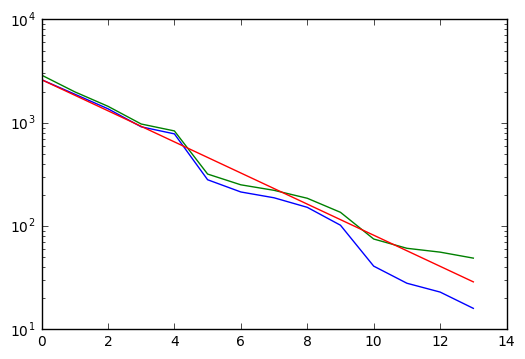

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(G_list)
plt.plot(H_list)
x = np.arange(10,150,10)
plt.plot(G_list[0]/2**(x/20)*2**(1/2))
plt.yscale('log')
plt.show()

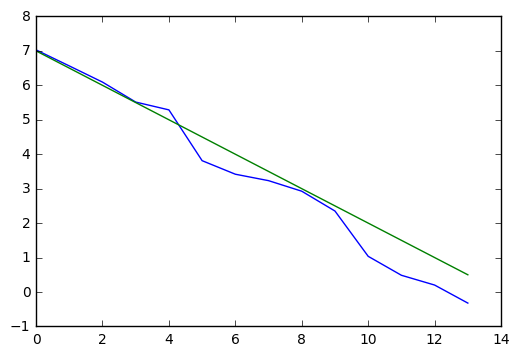

In [51]:
plt.plot(np.log2(np.array(G_list)/20))
#plt.plot(H_list)
x = np.arange(10,150,10)
plt.plot(7-(x-10)/20)
#plt.yscale('log')
plt.show()

In [64]:
np.log2(G_list[0]/20)

7.0295633144326581

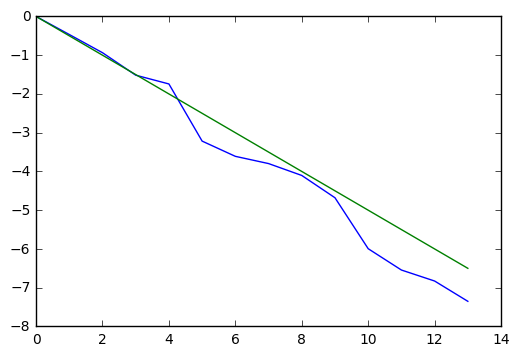

In [65]:
plt.plot(np.log2(np.array(G_list)/20)-np.log2(G_list[0]/20))
#plt.plot(H_list)
x = np.arange(10,150,10)
plt.plot(-(x-10)/20)
#plt.yscale('log')
plt.show()

In [ ]:
T threshold, Ge nb of edges of G
On a donc à peut pret:
    log2(Ge0/20)-(T-T0)/20 = log2(Ge/20)
    T = T0+20*(log2(Ge0/20)-log2(Ge/20))
    T = T0+20*log2(Ge0/Ge)

In [41]:
H_list = []
G_list = []
year = 2016
month = 4
day_list = mlg.days_of_month(year,month)
for threshold in range(10,150,10):
    H,G_all = compute_components(text_data,day_list,threshold=threshold)
    H_list.append(H.size())
    G_list.append(G_all.size())

Dates are from 01-04-2016 to 30-04-2016.
Computing the multilayer graph.
Nb of edges: 6518, nb of nodes: 4302.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 4579, nb of nodes: 3080.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 2781, nb of nodes: 2148.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 2476, nb of nodes: 1942.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 1759, nb of nodes: 1440.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 1252, nb of nodes: 1138.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 899, nb of nodes: 855.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 535, nb of nodes: 571.
Compressing the connected components.
Computing the multilayer graph.
Nb of edges: 455, nb of nodes: 503.
Compressing the connected compo

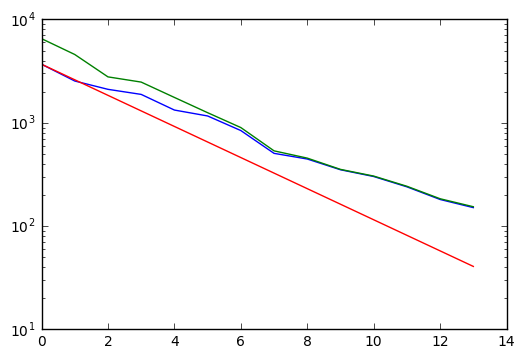

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(G_list)
plt.plot(H_list)
x = np.arange(10,150,10)
plt.plot(G_list[0]/2**(x/20)*2**(1/2))
plt.yscale('log')
plt.show()

In [80]:
for month in range(1,10):
    threshold = 30
    day_list = mlg.days_of_month(year,month)
    H,G_all = compute_components(text_data,day_list,threshold)
    print(G_all.size())
    print(20*np.log2(G_all.size()/50.0))
    threshold2 = max(25,threshold+20*np.log2(G_all.size()/70.0))
    print(threshold2)
    H,G_all = compute_components(text_data,day_list,threshold=threshold2)
    print(G_all.size())
    print('_____________________')
    

Dates are from 01-01-2016 to 31-01-2016.
Computing the multilayer graph.
Nb of edges: 213, nb of nodes: 213.
Compressing the connected components.
170
35.3106949273
55.6021583839
Computing the multilayer graph.
Nb of edges: 83, nb of nodes: 72.
Compressing the connected components.
51
_____________________
Dates are from 01-02-2016 to 29-02-2016.
Computing the multilayer graph.
Nb of edges: 13, nb of nodes: 17.
Compressing the connected components.
13
-38.8683294327
25
Computing the multilayer graph.
Nb of edges: 14, nb of nodes: 17.
Compressing the connected components.
14
_____________________
Dates are from 01-03-2016 to 31-03-2016.
Computing the multilayer graph.
Nb of edges: 39, nb of nodes: 53.
Compressing the connected components.
32
-12.8771237955
25
Computing the multilayer graph.
Nb of edges: 64, nb of nodes: 78.
Compressing the connected components.
50
_____________________
Dates are from 01-04-2016 to 30-04-2016.
Computing the multilayer graph.
Nb of edges: 2781, nb of node